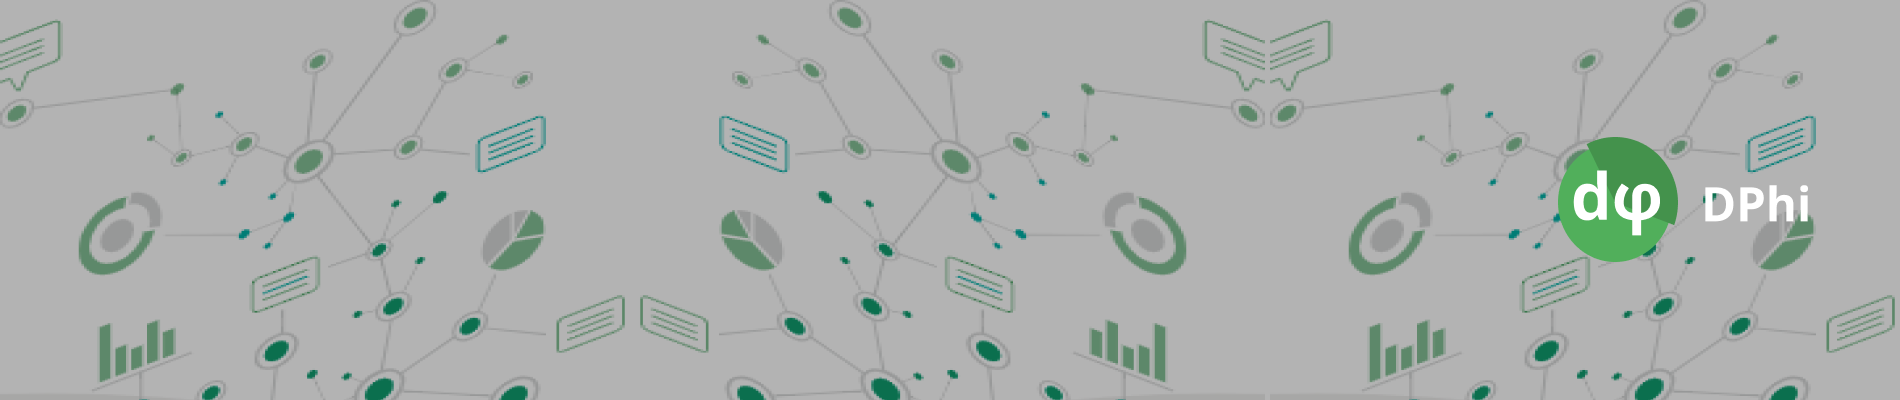

# <p style="text-align:center;font-size:150%;font-family:Roboto;background-color:#a04070;border-radius:50px;font-weight:bold;margin-bottom:0">IITB - DATATHON</p>

<p style="font-family:Roboto;font-size:140%;color:#a04070;">As a part of the bootcamp organized by IITB in collaboration with Dphi this is the graded Datathon to showcase the learnings of this Bootcamp. In this Datathon our task is to predict the weather represented in a picture. We have been provided with the 5 different types of weather data and images related to the same which has been used in this notebook to build a weather prediction based on Deep Learning and Computer Vision.</p> 

<!-- <a id='top'></a> -->
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#a04070;font-family:Roboto;font-size:160%;text-align:center;border-radius:50px;">TABLE OF CONTENTS</p>   
    
* [1. Importing Libraries](#1)
    
* [2. Loading Data and Visualization](#2)
    
* [3. Preapring Training Data](#3)
    
* [4. Transfer Learning](#4) 

* [5. Visualizing Convolutions](#5) 

* [6. Predictions](#6) 
    
* [7. The End](#7) 

<a id="1"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">IMPORTING LIBRARIES</p>

In [1]:
%%capture
!conda install -y gdown
!gdown --id 10ti8oOuGyp5MqcEkxXAN1sfUi4Dlg_u5 --folder

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as tfl

In [3]:
# Extracting the compressed dataset.
from zipfile import ZipFile
data_path = './IITB Deep Learning/weather.zip'

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')

The data set has been extracted.


<a id="2"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Loading Data and Visualization</p>

In [4]:
df = pd.read_csv('./Training_set.csv')
df['image_path'] = './train/'
df['image_path'] = df['image_path'].str.cat(df['filename'])
df = df.drop(['filename'], axis=1)
df.tail()

,label,image_path
1043,foggy,./train/Image_1044.jpg
1044,sunrise,./train/Image_1045.jpg
1045,cloudy,./train/Image_1046.jpg
1046,rainy,./train/Image_1047.jpg
1047,sunrise,./train/Image_1048.jpg


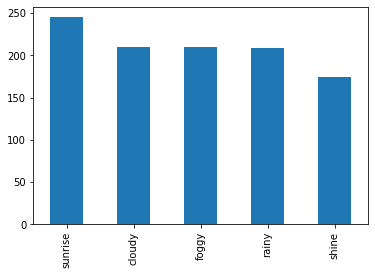

In [5]:
df['label'].value_counts().plot.bar()
plt.show()

<p style="font-family:Roboto;font-size:140%;color:#a04070;">This implies that we have been provided approximately equal number of images for each of the weather category for which we want to build a classifier.</p>

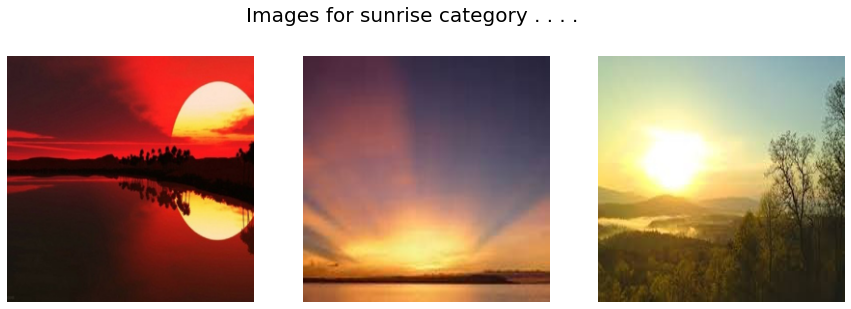

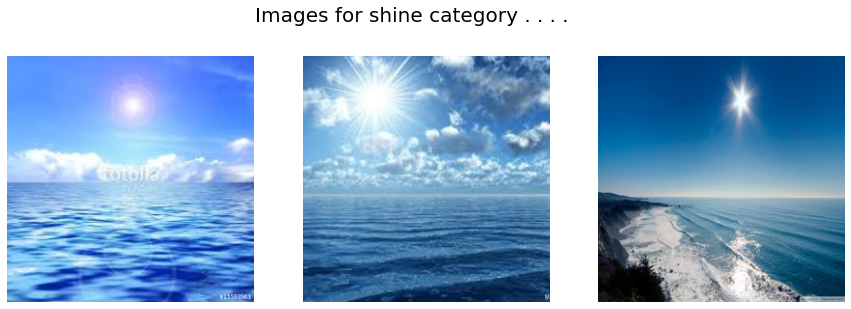

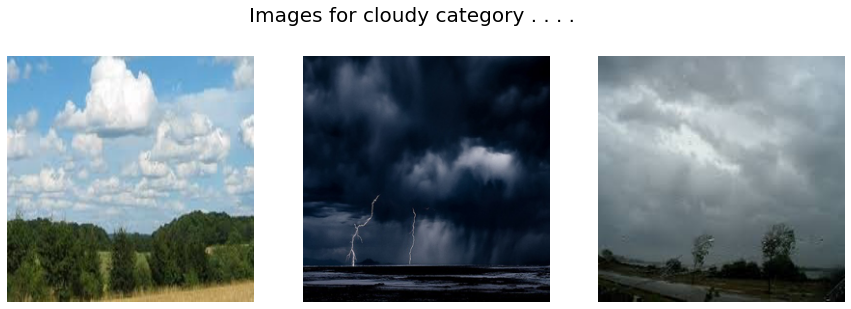

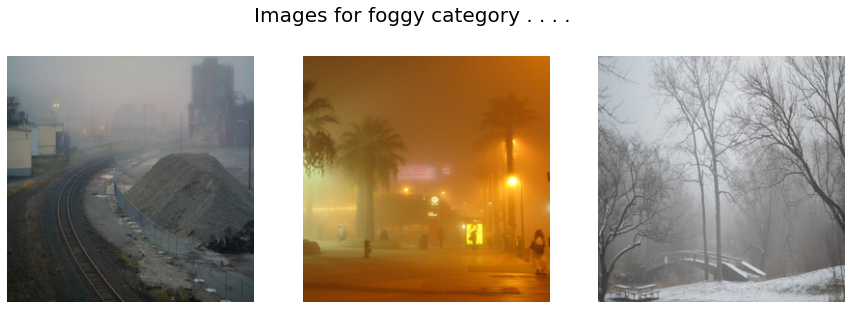

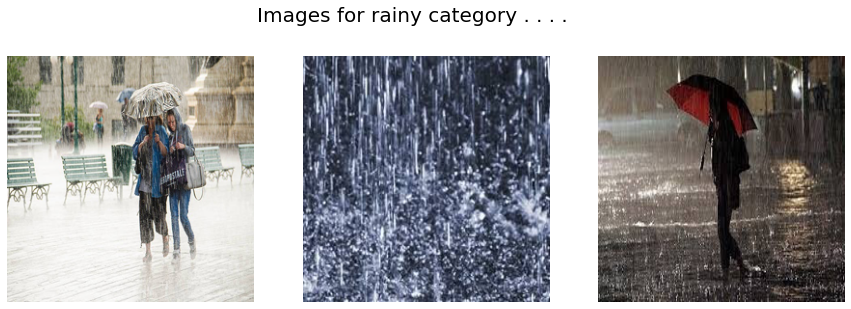

In [6]:
weather = df['label'].unique()
img_size = 256

for wea in weather:
    weather_spec = df[df['label']==wea]
    
    index_list = weather_spec.index
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    fig.suptitle(f'Images for {wea} category . . . .', fontsize=20)
    for i in range(3):
        index = np.random.randint(0,len(index_list))
        index = index_list[index]
        data = df.iloc[index]
        
        
        image_path = data[1]
        
        img = np.array(Image.open(image_path).resize((img_size,img_size)))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

<p style="font-family:Roboto;font-size:140%;color:#a04070;">These are some of the sample images from each of the given category.</p>

<a id="3"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Preparing Data for Training</p>
<p style="font-family:Roboto;font-size:140%;color:#a04070;">We will use opencv library to preprocess the image data. We will convert the given image into arrays of their pixel values and then use them to develop a deep learning model.</p>

In [7]:
def get_data(data, img_size = img_size):
  X = []
  Y = tf.one_hot(data.label, 5)

  
  for path in data.image_path:
    img = cv2.imread(path)
    img = cv2.resize(img, (img_size, img_size))

    X.append(img)

  return np.array(X), Y

In [8]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
labels = le.classes_

In [9]:
df_train, df_val = train_test_split(df, test_size=0.1, random_state=42)
print(df_train.shape, df_val.shape)

(943, 2) (105, 2)


<p style="font-family:Roboto;font-size:140%;color:#a04070;">We will hold 10% of the total data for validation purpose and to evaluate the performance of the model on unseen data.</p>

In [10]:
X_train, Y_train = get_data(df_train)
X_val, Y_val = get_data(df_val)

2022-06-19 18:46:53.796545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 18:46:53.945289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 18:46:53.946102: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 18:46:53.948726: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<a id="4"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Tranfer Learning</p>
<p style="font-family:Roboto;font-size:140%;color:#a04070;">Transfer learning technique help us to build high performance predictive model by leveraging the models which has been trained on the millions of images and has been training on high computing power machines and for weeks.</p>

In [11]:
preprocess_input = tf.keras.applications.vgg19.preprocess_input

pre_trained_model = tf.keras.applications.VGG19(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')

pre_trained_model.trainable = False

80150528/80134624 [==============================] - 0s 0us/step


In [12]:
pre_trained_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

<p style="font-family:Roboto;font-size:140%;color:#a04070;">There are total of 22 convolutions and maxx-pooling layers in the VGG19 model. Weights of these layers are well suited to extract low level as well as high level features from the images.</p>

In [21]:
inputs = tf.keras.Input(shape=(img_size,img_size,3))
x = preprocess_input(inputs)
x = pre_trained_model(x)

x = tfl.Flatten()(x)
x = tfl.Dense(256, activation='relu')(x)
x = tfl.BatchNormalization()(x)
x = tfl.Dense(256, activation='relu')(x)
x = tfl.Dropout(0.3)(x)
x = tfl.BatchNormalization()(x)
outputs = tfl.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_2 ( (None, 256, 256, 3)       0         
_________________________________________________________________
tf.nn.bias_add_2 (TFOpLambda (None, 256, 256, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               8388864   
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

<p style="font-family:Roboto;font-size:140%;color:#a04070;">I am not using the sparse categorical crossentropy because there are some relation between each classes so, I would like my model to predict the soft probability of an image belonging to a particular class.</p>

In [23]:
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, min_delta=0.01, verbose=1)

class oee(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if(logs.get('val_accuracy') > 0.95):
            print('\nStopping training as validation accuracy has reached 90%.')
            self.model.stop_training=True

<p style="font-family:Roboto;font-size:140%;color:#a04070;">Using callbacks helps us to use a high value of epochs without worrying about the problem of overfitting.</p>

In [24]:
history = model.fit(X_train, Y_train,
                     epochs=20,
                     batch_size = 64,
                     verbose = 1,
                     callbacks=[es, oee()],
                     validation_data=(X_val, Y_val)
)

Epoch 1/20
15/15 [==============================] - 4s 204ms/step - loss: 1.0373 - accuracy: 0.6299 - val_loss: 0.6690 - val_accuracy: 0.8095
Epoch 2/20
15/15 [==============================] - 3s 185ms/step - loss: 0.1545 - accuracy: 0.9650 - val_loss: 0.3778 - val_accuracy: 0.8571
Epoch 3/20
15/15 [==============================] - 3s 185ms/step - loss: 0.0718 - accuracy: 0.9905 - val_loss: 0.2978 - val_accuracy: 0.9048
Epoch 4/20
15/15 [==============================] - 3s 184ms/step - loss: 0.0475 - accuracy: 0.9958 - val_loss: 0.2475 - val_accuracy: 0.9143
Epoch 5/20
15/15 [==============================] - 3s 186ms/step - loss: 0.0302 - accuracy: 0.9979 - val_loss: 0.2120 - val_accuracy: 0.9333
Epoch 6/20
15/15 [==============================] - 3s 184ms/step - loss: 0.0263 - accuracy: 0.9979 - val_loss: 0.2051 - val_accuracy: 0.9429
Epoch 7/20
15/15 [==============================] - 3s 185ms/step - loss: 0.0205 - accuracy: 0.9989 - val_loss: 0.2053 - val_accuracy: 0.9429
Epoch 

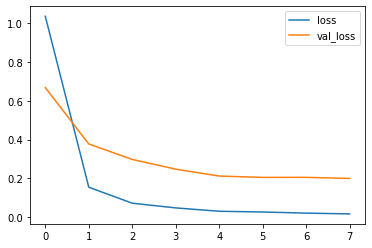

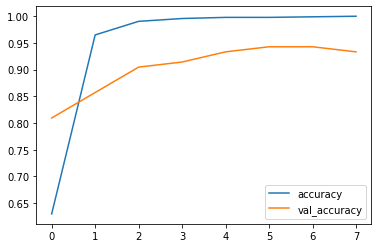

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

<a id="5"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Visualizing Concolutions</p>
<p style="font-family:Roboto;font-size:140%;color:#a04070;">Let's visualize some of the convolutions layer to get the feel of how a convolutional neural network extract features an input image. I have shown the visualizations for the shallow as well as the deeper layers of the network in this notebook.</p>

In [26]:
feature_layers = [
    'block1_conv1',
    'block2_conv1',
    'block3_conv1',
    'block4_conv1',
    'block5_conv1']

<p style="font-family:Roboto;font-size:140%;color:#a04070;">We will visualize the outputs of these convolutional layers.</p>

In [27]:
def get_layer_outputs(vgg, layer_names):
    outputs = [vgg.get_layer(layer).output for layer in layer_names]

    model = tf.keras.Model(vgg.input, outputs)
    return model

vgg_model_outputs = get_layer_outputs(pre_trained_model, feature_layers)

In [28]:
def clip_0_1(image):
    #Truncate all the pixels in the tensor to be between 0 and 1
    
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

def tensor_to_image(tensor):
    #Converts the given tensor into a PIL image

    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

<p style="font-family:Roboto;font-size:140%;color:#a04070;">Some utility functions to plot the output of the VGG19 model.</p>

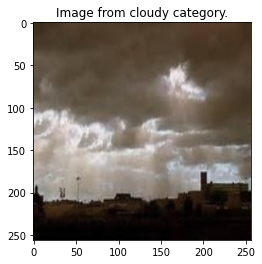

In [29]:
idx = np.random.randint(df.shape[0])
img = cv2.imread(df.iloc[idx][1])
example_image = cv2.resize(img, (img_size, img_size))

plt.imshow(example_image)
plt.title(f'Image from {labels[df.iloc[idx][0]]} category.')
plt.show()

In [30]:
example_image = np.expand_dims(example_image, axis = 0)
example_image.shape

(1, 256, 256, 3)

In [31]:
convolved_out = vgg_model_outputs(example_image)

Convolutions from layer number :  0


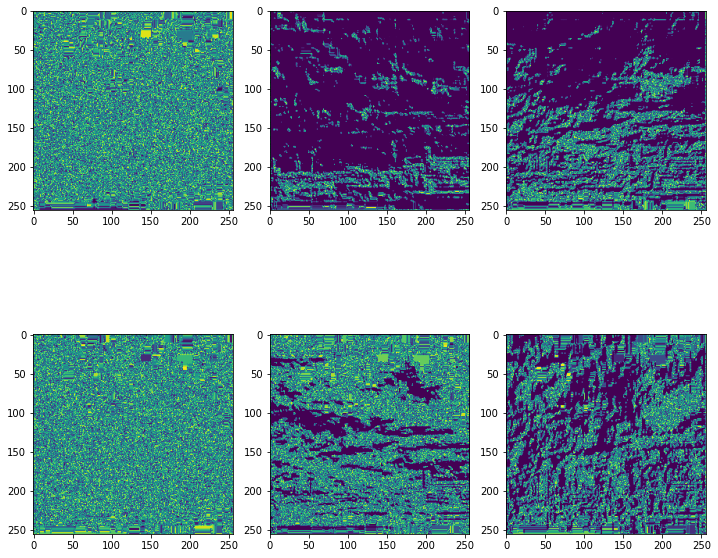

Convolutions from layer number :  1


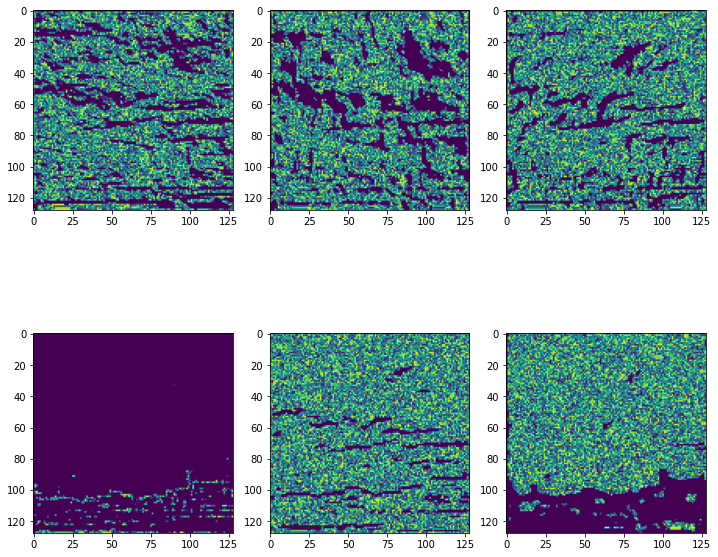

Convolutions from layer number :  2


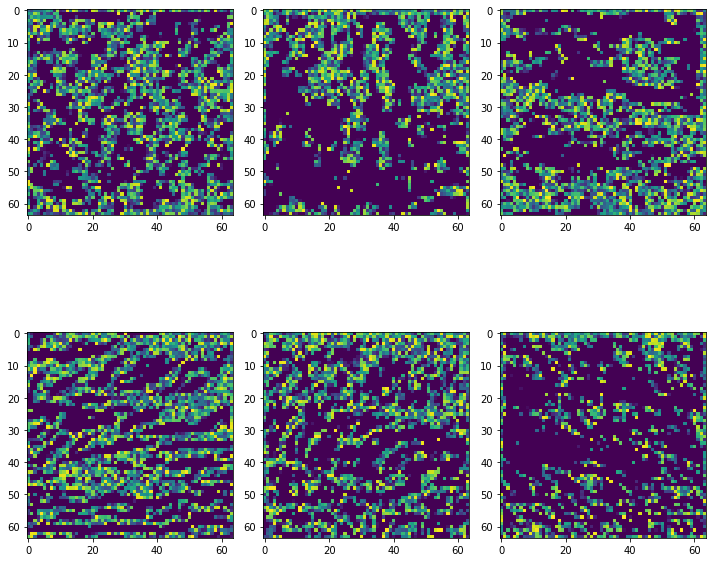

Convolutions from layer number :  3


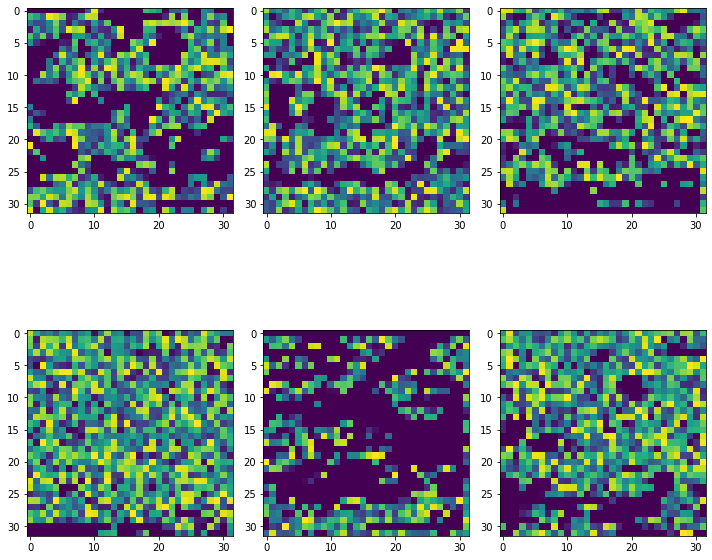

In [32]:
for j in range(4):
    plt.subplots(figsize=(10,10))
    print('Convolutions from layer number : ', str(j))
    for i in range(6):
        image = tensor_to_image(convolved_out[j][0, :, :, i * 10 +1])

        plt.subplot(2,3,i+1)
        plt.imshow(image)
    plt.tight_layout()
    plt.show()

<ul style="font-family:Roboto;font-size:140%;color:#a04070;">
    <li>Convolutions from the earlier layer shows that after the convolution operation features like line and curves has been highlighted which represent low level features.
    </li>
    <li>But the convolutions from the deeper layer has no meaning to us but they capture the high level features of an image.
    </li>
</ul>

<a id="6"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">Predictions</p>
<p style="font-family:Roboto;font-size:140%;color:#a04070;">In this section we will prepare the test data and then by using it and the model which has been trained on the training data we will predict the weather category of these images.</p>

In [33]:
df_test = pd.read_csv('./Testing_set.csv')
df_test['image_path'] = './test/'
df_test['image_path'] = df_test['image_path'].str.cat(df_test['filename'])
df_test['label'] = 0
df_test.head()

,filename,image_path,label
0,Image_1.jpg,./test/Image_1.jpg,0
1,Image_2.jpg,./test/Image_2.jpg,0
2,Image_3.jpg,./test/Image_3.jpg,0
3,Image_4.jpg,./test/Image_4.jpg,0
4,Image_5.jpg,./test/Image_5.jpg,0


In [34]:
X_test, _ = get_data(df_test)

In [35]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)
pred = []

for idx in predictions:
  pred.append(labels[idx])

In [36]:
ss = pd.DataFrame({'label':pred})
ss.head()
ss['label'].value_counts()

sunrise    112
rainy       87
foggy       85
shine       84
cloudy      82
Name: label, dtype: int64

In [37]:
ss.to_csv('Submission.csv', index=False)

<a id="7"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">The End</p>
<p style="font-family:Roboto;font-size:140%;color:#a04070;">
Thankyou so much for reading this notebook.
</p>